In [1]:
import pandas as pd
import json
from tqdm.auto import tqdm
from IPython.display import clear_output
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('change_org_petitions_Amber_Heard_at_20221002-105030_limit_2000_offset_0_delay_ms_5000.csv')

results = json.load(open('classification.json', 'r')) # or {}

In [3]:
def ask(options):
    ok = False
    while not ok:
        inp = input('decision')
        if inp in options:
            print(inp)
            return inp

In [4]:
len(set(df['petition.slug']) - set(results.keys()))

12

In [5]:
for i, r in tqdm(df.iterrows(), total=len(df)):
    print(i, "/", len(df))
    slug = r['petition.slug']
    if slug in results:
        continue
    print("TO", r['_source.targeting_description'])
    print("ASK", r['_source.ask'])
    print("DESCR", r['petition.description'])
    a = ask(['for', 'against', 'related', 'irrelevant'])
    results[slug] = a
    clear_output()

593 / 594


In [6]:
import json
json.dump(results, open('classification.json', 'w'))

In [7]:
pickle.dump

NameError: name 'pickle' is not defined

In [8]:
df_out = pd.DataFrame(results.items(), columns=['slug', 'status'])
df_out.to_csv('./data/all_petitions_status_manual.csv', index=False)
df_out

,slug,status
0,dc-entertainment-remove-amber-heard-from-aquam...,against
1,l-oréal-remove-amber-heard-as-l-oreal-spokespe...,against
2,hollywood-boycott-aquaman-2-amber-heard,against
3,united-states-supreme-court-put-amber-heard-be...,against
4,people-with-common-sense-amber-heard-must-be-f...,against
...,...,...
595,lidl-rape-isn-t-funny-and-rape-jokes-should-no...,for
596,remove-tug-proganda-from-youtube,for
597,stop-stigma-against-people-with-bpd,against
598,dhs-legal-kidnapping-of-children-and-family-co...,irrelevant


In [9]:
sss = [slug for slug, status in results.items() if status == 'irrelevant']

In [10]:
results['warner-brothers-leave-ezra-miller-as-the-flash-and-in-fantastic-beasts-3'] = 'related'
results['warner-brothers-for-johnny-depp-to-keep-his-job-as-grindelwald'] = 'against'
results['at-t-boycott-warner-media-and-their-parent-company-at-t'] = 'against'

In [11]:
df[df['petition__slug'] == sss[107]].petition__description.iloc[0]
sss[107]

KeyError: 'petition__slug'

In [15]:
for s in tqdm(sss):
    print(s)
    print(str(df[df['petition.slug'] == s]['petition.description'].iloc[0]))
    input()
    clear_output()

  0%|          | 0/140 [00:00<?, ?it/s]

australia-needs-an-animal-abuse-registry-for-offenders
<p><strong>Australia's animal cruelty laws are disgraceful and in no way offer justice for so many innocent souls that are abused, tortured or neglected</strong> by the hands of humans. This petition is to raise public awareness of these (non punishable offences) and to finally give these animals some justice by naming and shaming the offenders and banning them from ever owning Animals ever again!!</p>
<p>We must be the voice for the voiceless... it takes a village to make actual change so let's all band together and fight for all animals in Australia.<br><br>By the community showing their support and rallying together hopefully we can bring about a change for animal welfare.<br><br><strong>I have been an Animal advocate for many years and I see countless people get a slap on the wrist or just a fine for animal cruelty.</strong></p>
<p>Their lives matter just as much and it's time to stand up for them and be heard... we have a sex 

KeyboardInterrupt: Interrupted by user

In [16]:
# before
sss.index('tim-butler-tow-operators-lives-matter')

105

In [17]:
from matplotlib import pyplot as plt
from collections import Counter

In [18]:
df_out_filter = df_out[df_out['status'] != 'irrelevant']

In [19]:
statuses, counts = list(zip(*Counter(df_out_filter.status).most_common()))

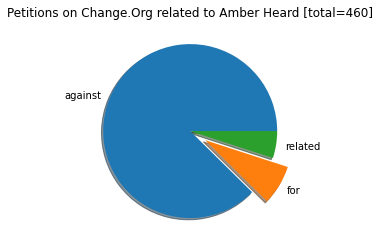

In [20]:
plt.title("Petitions on Change.Org related to Amber Heard [total=%d]" % len(df_out_filter))
plt.pie(counts, labels=statuses, explode=[0, 0.2, 0], shadow=True)
plt.savefig('./figures/amber_heard_change_org_pie_chart.png', bbox_inches='tight')
plt.show()